In [2]:
import numpy as np

timesteps = 10 # 시점의 수. 보통 문장의 길이
input_size = 4 # 입력의 차원. 보통 단어 벡터의 차원
hidden_size = 8 # 은닉 상태의 크기. 메모리 셀의 용량

inputs = np.random.random((timesteps, input_size)) # 입력에 해당되는 2D 텐서

hidden_state_t = np.zeros((hidden_size,)) # 초기 은닉 상태는 0(벡터)로 초기화
# 은닉 상태의 크기 hidden_size로 은닉 상태를 만듬.

In [6]:
print(inputs)
print(inputs.shape)

[[0.72205779 0.74804886 0.18939083 0.28049449]
 [0.59782798 0.11274755 0.08244656 0.97437726]
 [0.95761534 0.97046366 0.35240534 0.80195514]
 [0.61210679 0.99189348 0.20636254 0.00502784]
 [0.47174565 0.39036822 0.61990652 0.15905979]
 [0.73321978 0.28141217 0.17530519 0.41386618]
 [0.52121205 0.15292853 0.25757913 0.81303725]
 [0.86207035 0.9364869  0.35479195 0.01972132]
 [0.46155241 0.1250886  0.73467058 0.86687349]
 [0.5256695  0.93789956 0.19473507 0.00851504]]
(10, 4)


In [7]:
# 초기 hidden state. 0으로 시작작
print(hidden_state_t) 
print(hidden_state_t.shape)

[0. 0. 0. 0. 0. 0. 0. 0.]
(8,)


In [10]:
# parameters
Wx = np.random.random((hidden_size, input_size)) 
Wh = np.random.random((hidden_size, hidden_size))
b = np.random.random((hidden_size,))

print(Wx.shape)
print(Wh.shape)
print(b.shape)

(8, 4)
(8, 8)
(8,)


In [19]:
total_hidden_states = []

for input_ in inputs:
    output_t = np.tanh(np.dot(Wx, input_) + np.dot(Wh, hidden_state_t) + b) # Wx * Xt + Wh * Ht-1 + b(bias)
    total_hidden_states.append(list(output_t))
    print(np.shape(total_hidden_states)) # 각 시점 t별 메모리 셀의 출력의 크기 (timestep, output_dim)
    hidden_state_t = output_t
    
total_hidden_states = np.stack(total_hidden_states, axis=0) # 출력 시 값을 깔끔하게 해준다.
print(total_hidden_states)

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.99983838 0.99997002 0.99997278 0.99998538 0.99998707 0.99981431
  0.9999871  0.99985977]
 [0.9996477  0.9999731  0.99993608 0.99998671 0.99999288 0.99991817
  0.99997054 0.9999287 ]
 [0.99993886 0.99998072 0.99998884 0.99999582 0.99999702 0.99995099
  0.99999455 0.99996022]
 [0.99987026 0.99996414 0.99997866 0.99997954 0.99997851 0.99973254
  0.99998834 0.99980104]
 [0.99965916 0.9999677  0.99996119 0.99998333 0.99998502 0.99982666
  0.99998751 0.9998971 ]
 [0.99964228 0.9999715  0.99994362 0.99998429 0.99998786 0.99980735
  0.99997952 0.99986158]
 [0.99964005 0.99997171 0.99994329 0.99998609 0.99999178 0.99991172
  0.9999761  0.99993027]
 [0.99987725 0.99997242 0.99998153 0.99998873 0.99998776 0.99977691
  0.99999269 0.99985307]
 [0.9996788  0.9999759  0.99996235 0.9999922  0.99999542 0.99995439
  0.99998806 0.99997008]
 [0.99985067 0.99996143 0.99997564 0.99997554 0.99997491 0.99972108
  0.99998618 0.99978979]

In [20]:
# pytorch
import torch
import torch.nn as nn

In [22]:
input_size = 5
hidden_size = 8

# batch_size, time_steps, input_size
inputs = torch.Tensor(1, 10, 5)
cell = nn.RNN(input_size, hidden_size, batch_first = True)

In [24]:
outputs, _status = cell(inputs)

In [28]:
print(outputs.shape) # 모든 time-step의 hidden_state
print(outputs)

torch.Size([1, 10, 8])
tensor([[[-0.5452, -0.2048,  0.1180,  0.3021,  0.3046, -0.2959, -0.1344,
           0.2103],
         [-0.5286, -0.0950, -0.0804,  0.4419,  0.4556, -0.2118, -0.1317,
           0.3000],
         [-0.5058, -0.0536, -0.1181,  0.4322,  0.5481, -0.1765, -0.1688,
           0.3309],
         [-0.4892, -0.0239, -0.1320,  0.4427,  0.5720, -0.1828, -0.1822,
           0.3219],
         [-0.4860, -0.0089, -0.1291,  0.4406,  0.5766, -0.1851, -0.1810,
           0.3305],
         [-0.4839, -0.0091, -0.1339,  0.4389,  0.5739, -0.1864, -0.1858,
           0.3360],
         [-0.4821, -0.0093, -0.1331,  0.4377,  0.5747, -0.1847, -0.1851,
           0.3360],
         [-0.4822, -0.0091, -0.1331,  0.4379,  0.5744, -0.1853, -0.1859,
           0.3354],
         [-0.4821, -0.0089, -0.1327,  0.4379,  0.5745, -0.1852, -0.1853,
           0.3355],
         [-0.4822, -0.0090, -0.1329,  0.4378,  0.5742, -0.1853, -0.1856,
           0.3356]]], grad_fn=<TransposeBackward1>)


In [29]:
print(_status.shape) # 최종 time-step의 hidden_state
print(_status)

torch.Size([1, 1, 8])
tensor([[[-0.4822, -0.0090, -0.1329,  0.4378,  0.5742, -0.1853, -0.1856,
           0.3356]]], grad_fn=<StackBackward0>)


## Deep RNN

In [30]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [33]:
# num_layer를 통해 hidden state의 layer 개수를 추가
cell = nn.RNN(input_size=5, hidden_size=8, num_layers=2, batch_first=True) 
outputs , _status = cell(inputs)

In [37]:
print(outputs.shape)
print(_status.shape) # 층의 개수, 배치크기, 은닉상태의 크기

torch.Size([1, 10, 8])
torch.Size([2, 1, 8])


## Bidirectional Recurrent Neural Network

중간의 빈칸으로 남겨진 단어를 예측할 때, 과거의 sequence 뿐만 아니라, 이후 시점의 데이터도 사용해야한다. 따라서, 양방향 RNN을 사용
- 두개의 메모리셀을 사용. 첫 메모리셀은 이전 시점의 hidden status를 받음. 두번 째 메모리셀은 뒷 시점의 hidden status를 받음

In [38]:
# batch_size, time_steps, input_size
inputs = torch.Tensor(1, 10, 5)

In [40]:
cell = nn.RNN(input_size=5, hidden_size=8, num_layers=2, batch_first=True, bidirectional=True)

In [41]:
outputs, _status = cell(inputs)

In [43]:
print(outputs.shape)
print(_status.shape) # (층의 개수 x 2, 배치 크기, 은닉 상태의 크기)

torch.Size([1, 10, 16])
torch.Size([4, 1, 8])


---
### Tensorflow로 간단한 RNN 구현하기

시간은 주기성을 가지기 때문에 그 특징을 입력 값으로 사용하면 예측 성능을 높여줄 수 있다.

시간은 아래와 같은 주기성이 있다.

1년은 52 주(365일) : X = 52
1일은 24 시간 : X = 24
1시간은 60 분 : X = 60

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [135]:
t = np.arange(0, 1000)
x = np.sin(0.02 * t) + np.random.rand(1000)
train, test = x[0:800], x[800:1000]

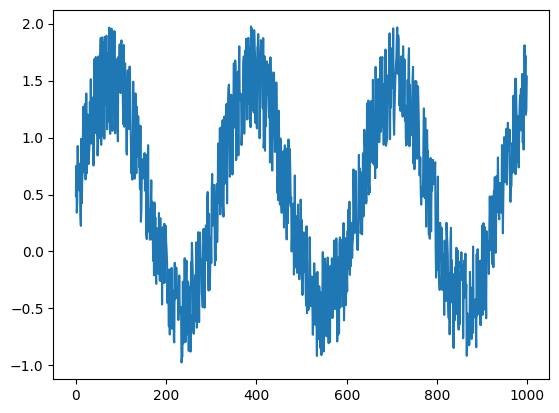

In [136]:
plt.plot(x)
plt.show()

In [83]:
# 3개의 연속된 값을 묶어 4번째 값을 결과로 뱉는 데이터로 만들기
# INPUT				            OUTPUT
# sin(0) sin(1) sin(2) sin(3)	sin(4)
# sin(1) sin(2) sin(3) sin(4)	sin(5)
# sin(2) sin(3) sin(4) sin(5)	sin(6)

In [137]:
def convert_to_matrix(data, step):
    x, y = [], []
    for i in range(len(data) - step):
        d = i + step
        x.append(data[i:d])
        y.append(data[d])
    return np.array(x), np.array(y)

In [142]:
train = np.append(train, np.repeat(train[-1], 4))
test = np.append(test, np.repeat(test[-1], 4))

train_x, train_y = convert_to_matrix(train, 4)
test_x, test_y = convert_to_matrix(test, 4)

train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

In [280]:
train_x.shape

(804, 1, 4)

In [288]:
test_x.shape

(204, 1, 4)

In [139]:
train_x[-4:-1]

array([[[ 0.78408901,  0.06141458, -0.22925147, -0.02396798]],

       [[ 0.06141458, -0.22925147, -0.02396798, -0.02396798]],

       [[-0.22925147, -0.02396798, -0.02396798, -0.02396798]]])

In [157]:
np.random.random((1,1,2))

array([[[0.73819661, 0.65958212]]])

In [155]:
np.random.random((1,2,1))

array([[[0.79281736],
        [0.33672425]]])

In [156]:
np.random.random((2,1,1))

array([[[0.58361449]],

       [[0.06062829]]])

In [113]:
len(train)

808

In [114]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1, 4), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['acc'])

In [115]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 32)                1184      
                                                                 
 dense_10 (Dense)            (None, 8)                 264       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [116]:
history=model.fit(train_x, train_y, epochs=10)

Epoch 1/10
26/26 [==============================] - 1s 902us/step - loss: 0.8387 - acc: 0.0000e+00
Epoch 2/10
26/26 [==============================] - 0s 922us/step - loss: 0.2546 - acc: 0.0000e+00
Epoch 3/10
26/26 [==============================] - 0s 928us/step - loss: 0.1083 - acc: 0.0000e+00
Epoch 4/10
26/26 [==============================] - 0s 1ms/step - loss: 0.1016 - acc: 0.0000e+00
Epoch 5/10
26/26 [==============================] - 0s 881us/step - loss: 0.1004 - acc: 0.0000e+00
Epoch 6/10
26/26 [==============================] - 0s 881us/step - loss: 0.0998 - acc: 0.0000e+00
Epoch 7/10
26/26 [==============================] - 0s 862us/step - loss: 0.0989 - acc: 0.0000e+00
Epoch 8/10
26/26 [==============================] - 0s 862us/step - loss: 0.0988 - acc: 0.0000e+00
Epoch 9/10
26/26 [==============================] - 0s 890us/step - loss: 0.0983 - acc: 0.0000e+00
Epoch 10/10
26/26 [==============================] - 0s 785us/step - loss: 0.0983 - acc: 0.0000e+00


In [158]:
history.history['loss']

[0.8387051820755005,
 0.2545868754386902,
 0.10834888368844986,
 0.10160452872514725,
 0.10036968439817429,
 0.0998232439160347,
 0.09887067973613739,
 0.09875471889972687,
 0.09832856804132462,
 0.09825421869754791]

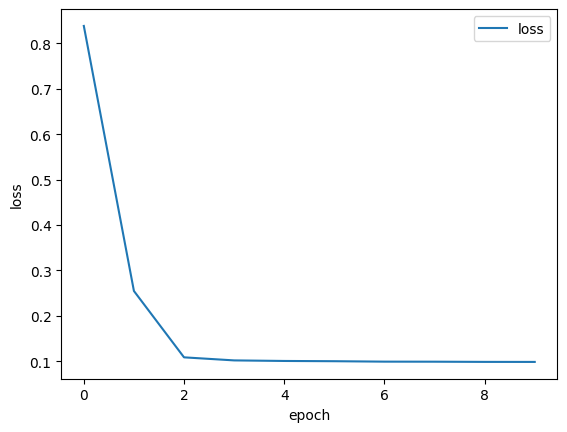

In [117]:
plt.plot(history.history['loss'], label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

In [118]:
test_loss, test_acc = model.evaluate(test_x, test_y)
print('loss: {:.4f}\nacc: {:.4f}'.format(test_loss, test_acc))

7/7 [==============================] - 0s 833us/step - loss: 0.0934 - acc: 0.0000e+00
loss: 0.0934
acc: 0.0000


---

In [130]:
pip install finance-datareader

Note: you may need to restart the kernel to use updated packages.


In [324]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [325]:
df = fdr.DataReader('005930', '2018-05-04', '2023-04-06')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-05-04,53000,53900,51800,51900,39565391,-0.020755
2018-05-08,52600,53200,51900,52600,23104720,0.013487
2018-05-09,52600,52800,50900,50900,16128305,-0.032319
2018-05-10,51700,51700,50600,51600,13905263,0.013752
2018-05-11,52000,52200,51200,51300,10314997,-0.005814


In [326]:
df.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-03-30,63700,63700,63100,63200,15684377,0.007974
2023-03-31,64000,64000,63700,64000,14094479,0.012658
2023-04-03,64000,64000,63000,63100,11973133,-0.014062
2023-04-04,63400,63800,62800,63600,11120514,0.007924
2023-04-05,63700,64000,63400,63900,9050155,0.004717


In [327]:
dfx = df[['Open', 'High', 'Low', 'Volume', 'Close']]

In [328]:
for col in dfx.columns:
    scaler = MinMaxScaler()
    dfx[col] = scaler.fit_transform(dfx)
    
dfy = dfx[['Close']]
dfx = dfx.drop('Close', axis=1)

In [329]:
x = dfx.values.tolist()
y = dfy.values.tolist()

In [330]:
# 5일 동안의 OHLVC 데이터로 다음 날의 종가를 예측
window_size = 5
data_x, data_y = [], []

for i in range(len(y) - window_size):
    _x = x[i: i+window_size]
    _y = y[i+window_size]
    data_x.append(_x)
    data_y.append(_y)

In [331]:
train_size = int(len(data_y) * 0.8)
X_train = np.array(data_x[0 : train_size])
y_train = np.array(data_y[0 : train_size])

X_test = np.array(data_x[train_size:])
y_test = np.array(data_y[train_size:])

print('train shape:' , X_train.shape, y_train.shape) # N of sample, step_size, feature_size / N of samples, step_size, feature_size
print('test shape:', X_test.shape, y_test.shape)

train shape: (966, 5, 4) (966, 1)
test shape: (242, 5, 4) (242, 1)


In [332]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [333]:
model = Sequential()
model.add(LSTM(units=20, activation='tanh', input_shape=(5,4)))
model.add(Dense(1))

In [334]:
model.compile(optimizer='SGD', loss='mse', metrics=['mse'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
31/31 [==============================] - 1s 2ms/step - loss: 0.1681 - mse: 0.1681
Epoch 2/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0378 - mse: 0.0378
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0251 - mse: 0.0251
Epoch 4/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0175 - mse: 0.0175
Epoch 5/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0122 - mse: 0.0122
Epoch 6/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0086 - mse: 0.0086
Epoch 7/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0061 - mse: 0.0061
Epoch 8/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0043 - mse: 0.0043
Epoch 9/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0031 - mse: 0.0031
Epoch 10/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023
Epoch 11/100
31/31 [==============================] - 0s 1m

In [335]:
y_pred = model.predict(X_test)

8/8 [==============================] - 0s 929us/step


In [337]:
y_pred.shape

(242, 1)

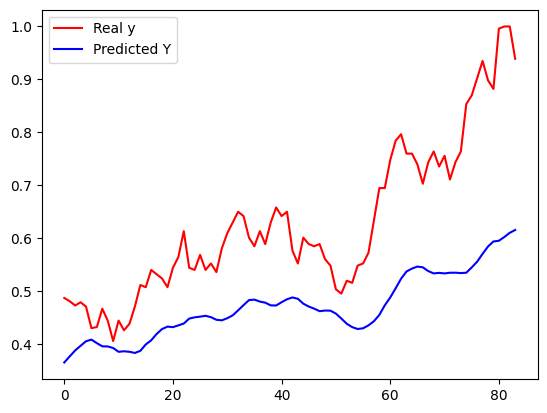

In [219]:
plt.figure()
plt.plot(y_test, color='red', label='Real y')
plt.plot(y_pred, color='blue', label='Predicted Y')
plt.legend()
plt.show()

In [220]:
model2 = Sequential()
model2.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(5,4)))
model2.add(LSTM(units=40, activation='relu', return_sequences=True))
model2.add(LSTM(units=20, activation='relu'))
model2.add(Dense(1))

In [221]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 5, 20)             2000      
                                                                 
 lstm_4 (LSTM)               (None, 5, 40)             9760      
                                                                 
 lstm_5 (LSTM)               (None, 20)                4880      
                                                                 
 dense_15 (Dense)            (None, 1)                 21        
                                                                 
Total params: 16,661
Trainable params: 16,661
Non-trainable params: 0
_________________________________________________________________


In [222]:
model2.compile(optimizer='adam', loss='mse')
model2.fit(X_train, y_train, epochs=100)

Epoch 1/100
11/11 [==============================] - 2s 3ms/step - loss: 0.0920
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0663
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0326
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 11/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 12/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 13/100
11/11 [=================

In [315]:
y_pred = model2.predict(X_test)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_9/lstm_3/while/lstm_cell_3/MatMul' defined at (most recent call last):
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\user\AppData\Local\Temp\ipykernel_32072\3772403742.py", line 1, in <module>
      y_pred = model2.predict(X_test)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\keras\engine\training.py", line 2382, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\keras\engine\training.py", line 2169, in predict_function
      return step_function(self, iterator)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\keras\engine\training.py", line 2155, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\keras\engine\training.py", line 2143, in run_step
      outputs = model.predict_step(data)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\keras\engine\training.py", line 2111, in predict_step
      return self(x, training=False)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\keras\layers\rnn\base_rnn.py", line 556, in __call__
      return super().__call__(inputs, **kwargs)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\keras\layers\rnn\lstm.py", line 625, in call
      last_output, outputs, states = backend.rnn(
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\keras\backend.py", line 5169, in rnn
      final_outputs = tf.compat.v1.while_loop(
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\keras\backend.py", line 5148, in _step
      output, new_states = step_function(
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\keras\layers\rnn\lstm.py", line 623, in step
      return self.cell(inputs, states, **kwargs)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\keras\layers\rnn\lstm.py", line 327, in call
      z = backend.dot(inputs, self.kernel)
    File "c:\ProgramData\Anaconda3\envs\dl1\lib\site-packages\keras\backend.py", line 2464, in dot
      out = tf.matmul(x, y)
Node: 'sequential_9/lstm_3/while/lstm_cell_3/MatMul'
Matrix size-incompatible: In[0]: [32,5], In[1]: [4,80]
	 [[{{node sequential_9/lstm_3/while/lstm_cell_3/MatMul}}]] [Op:__inference_predict_function_129129]

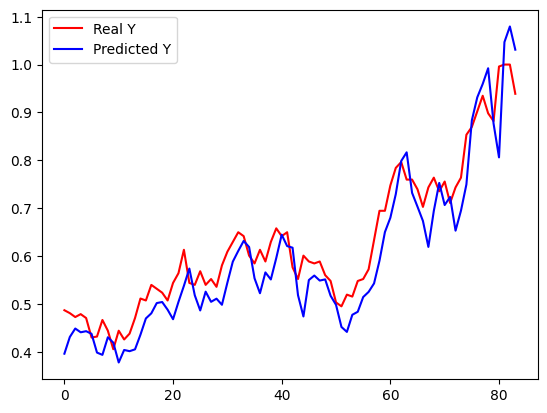

In [227]:
plt.figure()
plt.plot(y_test, color='red', label='Real Y')
plt.plot(y_pred, color='blue', label='Predicted Y')
plt.legend()
plt.show()

In [233]:
lstm = LSTM(20, return_sequences=True, return_state=True)
hidden_states, last_hidden_state, last_cell_state = lstm(X_train)

---
## Kaggle - Brent Oil Prices

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')

In [388]:
df = pd.read_csv('C:/Users/user/Downloads/vscode/4월1주차DL/Train/BrentOilPrices.csv')

In [384]:
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [385]:
df.tail()

,Date,Price
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37
9010,"Nov 14, 2022",93.59


In [386]:
df.describe()

,Price
count,9011.000000
mean,48.420782
std,32.860110
min,9.100000
25%,19.050000
50%,38.570000
75%,70.090000
max,143.950000


In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


In [390]:
df = df.set_index('Date')

In [377]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
v_scaled = scaler.fit_transform(df)

In [378]:
v_scaled

array([[0.07067112],
       [0.0693363 ],
       [0.07007786],
       ...,
       [0.63144234],
       [0.64716352],
       [0.62654802]])

In [348]:
df['Price'] = v_scaled

In [349]:
X = df.values.tolist()

In [350]:
step = 5
x, y = [], []
for i in range(len(X) - step):
    d = i + step
    x.append(X[i:d])
    y.append(X[d])

In [351]:
train_size = int(len(X) * 0.8)
X_train = np.array(x[0:train_size])
y_train = np.array(y[0:train_size])

X_test = np.array(x[train_size:])
y_test = np.array(y[train_size:])

In [352]:
X_train = X_train.reshape(-1, 1, step)
X_test = X_test.reshape(-1,1, step)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7208, 1, 5)
(1798, 1, 5)
(7208, 1)
(1798, 1)


In [353]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [354]:
model = Sequential()
model.add(LSTM(units=40, activation='relu', return_sequences=True, input_shape=(1,5)))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(LSTM(units=40, activation='relu', return_sequences=True))
model.add(Dense(1))

In [355]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 1, 40)             7360      
                                                                 
 lstm_14 (LSTM)              (None, 1, 80)             38720     
                                                                 
 lstm_15 (LSTM)              (None, 1, 40)             19360     
                                                                 
 dense_18 (Dense)            (None, 1, 1)              41        
                                                                 
Total params: 65,481
Trainable params: 65,481
Non-trainable params: 0
_________________________________________________________________


In [359]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
226/226 [==============================] - 2s 2ms/step - loss: 7.7261e-05 - mse: 7.7261e-05
Epoch 2/100
226/226 [==============================] - 0s 2ms/step - loss: 7.5779e-05 - mse: 7.5779e-05
Epoch 3/100
226/226 [==============================] - 0s 2ms/step - loss: 7.1086e-05 - mse: 7.1086e-05
Epoch 4/100
226/226 [==============================] - 0s 2ms/step - loss: 7.4020e-05 - mse: 7.4020e-05
Epoch 5/100
226/226 [==============================] - 0s 2ms/step - loss: 7.0495e-05 - mse: 7.0495e-05
Epoch 6/100
226/226 [==============================] - 0s 2ms/step - loss: 7.4931e-05 - mse: 7.4931e-05
Epoch 7/100
226/226 [==============================] - 0s 2ms/step - loss: 7.9358e-05 - mse: 7.9358e-05
Epoch 8/100
226/226 [==============================] - 0s 2ms/step - loss: 7.0314e-05 - mse: 7.0314e-05
Epoch 9/100
226/226 [==============================] - 0s 2ms/step - loss: 7.7771e-05 - mse: 7.7771e-05
Epoch 10/100
226/226 [==============================] - 0s 2ms/s

In [360]:
y_pred2 = model.predict(X_test)

57/57 [==============================] - 0s 862us/step


In [374]:
y_pred2.reshape(-1)

array([0.27852285, 0.28049934, 0.27308062, ..., 0.62090623, 0.629181  ,
       0.64579254], dtype=float32)

In [371]:
y_pred2.reshape(-1)

array([0.27852285, 0.28049934, 0.27308062, ..., 0.62090623, 0.629181  ,
       0.64579254], dtype=float32)

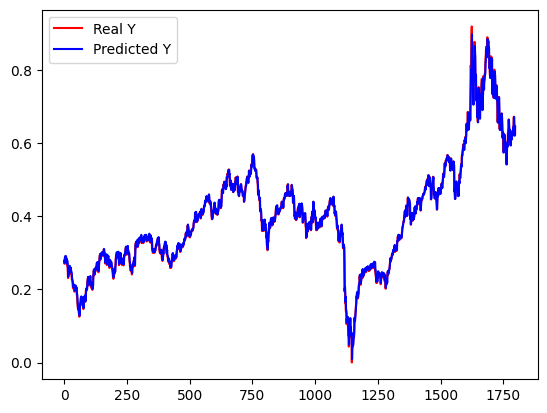

In [370]:
plt.figure()
plt.plot(y_test, color='red', label='Real Y')
plt.plot(y_pred2.reshape(-1), color='blue', label='Predicted Y')
plt.legend()
plt.show()

In [375]:
X_train

array([[[0.07067112, 0.0693363 , 0.07007786, 0.07044865, 0.07067112]],

       [[0.0693363 , 0.07007786, 0.07044865, 0.07067112, 0.07044865]],

       [[0.07007786, 0.07044865, 0.07067112, 0.07044865, 0.07044865]],

       ...,

       [[0.29032258, 0.28750463, 0.29558769, 0.284835  , 0.28053393]],

       [[0.28750463, 0.29558769, 0.284835  , 0.28053393, 0.27897664]],

       [[0.29558769, 0.284835  , 0.28053393, 0.27897664, 0.27801261]]])

In [376]:
X_test

array([[[0.284835  , 0.28053393, 0.27897664, 0.27801261, 0.27586207]],

       [[0.28053393, 0.27897664, 0.27801261, 0.27586207, 0.27786429]],

       [[0.27897664, 0.27801261, 0.27586207, 0.27786429, 0.27022618]],

       ...,

       [[0.63915462, 0.67059696, 0.67311828, 0.65072303, 0.62254357]],

       [[0.67059696, 0.67311828, 0.65072303, 0.62254357, 0.63144234]],

       [[0.67311828, 0.65072303, 0.62254357, 0.63144234, 0.64716352]]])

In [ ]:
1. load 2. preprocess 3. model 4. train 5. main.py(합치기)